<a href="https://colab.research.google.com/github/manabil/Applied_Machine_Learning/blob/main/(Study%20Case%20III)%20House%20Price%20in%20Beijing%20Predictor/House%20Price%20in%20Beijing%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Muhammad Ammar Nabil</br>
Kelas &nbsp;: M03</br>
Email &nbsp;: mammarnabil1@gmail.com

<center>

# **Housing Price Prediction**
###### [Quang Truong, Minh Nguyen, Hy Dang, Bo Mei](https://www.sciencedirect.com/science/article/pii/S1877050920316318)
---

</center>

In this notebook, we learn how to build a predictive model to predict price of house based on :


> ***26 features*** include =
* lng (Longitudinal) 
* lat (Latitude)
* square
* totalPrice
* Price
* etc

> Datasize size **318851 data**

</br>

## • ***Background***

I chose this problem because it helps property companies in determining house prices in several aspects

My reference comes from **Quang Truong, Minh Nguyen, Hai Dang, Bo Mei** in the journal entitled _**"Housing Price Prediction via Improved Machine Learning Techniques"**_. In the journal, they applied both traditional and advanced machine learning approaches to investigate the difference among several advanced models. They use dataset from kaggle [Housing price in Beijing](https://www.kaggle.com/datasets/ruiqurm/lianjia). For more details about my model, download this [Details Report]() <sub>Only available in Bahasa Indonesia</sub>



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## **Import and Understanding Dataset**

### *1. Data Loading*

In [ ]:
# Upload kaggle.json API
!mkdir ~/.kaggle
files.upload()
!mv kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle.json


In [ ]:
# Change permission
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep 15 14:22 .
drwx------ 1 root root 4096 Sep 15 14:22 ..
-rw------- 1 root root   63 Sep 15 14:22 kaggle.json


In [ ]:
# Download and extract kaggle dataset
!kaggle datasets download -d ruiqurm/lianjia
!unzip lianjia.zip
!mv new.csv lianjia.csv

 40% 5.00M/12.4M [00:00<00:00, 38.2MB/s]
100% 12.4M/12.4M [00:00<00:00, 63.7MB/s]
Archive:  lianjia.zip
  inflating: new.csv                 


In [ ]:
# load the dataset
datasets = pd.read_csv('lianjia.csv', encoding = "latin")
datasets

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


### *2. Exploratory Data Analysis - Variable Description*

In [ ]:
# Check data type each variable
print(datasets.shape)
datasets.info()

(318851, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floo

In [ ]:
# Show variable statistic
datasets.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


### *3. Exploratory Data Analysis - Removing Missing Value*

In [ ]:
# Checking Missing Value
print(datasets.isnull().sum())
print('\nSize before dropping',datasets.shape)

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

Size before dropping (318851, 26)


In [ ]:
# Drop Missing Value
datasets = datasets.dropna()
print('Size after dropping',datasets.shape, '\n')
print(datasets.isnull().sum())

Size after dropping (159376, 26) 

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64


In [ ]:
# Drop unused features
fixedData = datasets.drop(['url', 'id', 'Cid', 'floor', 'subway', 'district', 
                           'communityAverage', 'tradeTime', 'constructionTime'], 1)
fixedData

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty
0,116.475489,40.019520,1464.0,106,415.0,31680,131.00,2,1,1,1,1.0,3,6,0.217,1.0,0.0
1,116.453917,39.881534,903.0,126,575.0,43436,132.38,2,2,1,2,1.0,4,6,0.667,1.0,1.0
2,116.561978,39.877145,1271.0,48,1030.0,52021,198.00,3,2,1,3,4.0,3,6,0.500,1.0,0.0
3,116.438010,40.076114,965.0,138,297.5,22202,134.00,3,1,1,1,1.0,1,6,0.273,1.0,0.0
4,116.428392,39.886229,927.0,286,392.0,48396,81.00,2,1,1,1,4.0,2,2,0.333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318844,116.550348,39.755625,1.0,6,268.0,22709,118.02,2,2,1,2,4.0,4,6,0.500,0.0,1.0
318845,116.546899,39.755236,1.0,8,355.5,26491,134.20,3,2,1,2,3.0,4,6,0.500,1.0,1.0
318846,116.546899,39.755236,1.0,8,350.0,20580,170.07,3,2,1,2,4.0,1,6,0.333,0.0,1.0
318848,116.497256,39.804081,1.0,2,359.0,35138,102.17,2,2,1,2,4.0,3,6,0.500,1.0,1.0


In [ ]:
# Set Numerical value to categorical value
buildingType = ['ower', 'bungalow', 'tower', 'plate']
renovationCondition = ['other', 'rough', 'Simplicity', 'hardcover']
buildingStructure = ['unknow', 'mixed', 'wood', 'concrete', 'steel', 'composite ']

for i, value in enumerate(buildingType, 1):
    fixedData.loc[fixedData['buildingType'] == i, 'buildingType'] = value
    
for i, value in enumerate(renovationCondition, 1):
    fixedData.loc[fixedData['renovationCondition'] == i, 'renovationCondition'] = value

for i, value in enumerate(buildingStructure, 1):
    fixedData.loc[fixedData['buildingStructure'] == i, 'buildingStructure'] = value

fixedData

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty
0,116.475489,40.019520,1464.0,106,415.0,31680,131.00,2,1,1,1,ower,Simplicity,composite,0.217,1.0,0.0
1,116.453917,39.881534,903.0,126,575.0,43436,132.38,2,2,1,2,ower,hardcover,composite,0.667,1.0,1.0
2,116.561978,39.877145,1271.0,48,1030.0,52021,198.00,3,2,1,3,plate,Simplicity,composite,0.500,1.0,0.0
3,116.438010,40.076114,965.0,138,297.5,22202,134.00,3,1,1,1,ower,other,composite,0.273,1.0,0.0
4,116.428392,39.886229,927.0,286,392.0,48396,81.00,2,1,1,1,plate,rough,mixed,0.333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318844,116.550348,39.755625,1.0,6,268.0,22709,118.02,2,2,1,2,plate,hardcover,composite,0.500,0.0,1.0
318845,116.546899,39.755236,1.0,8,355.5,26491,134.20,3,2,1,2,tower,hardcover,composite,0.500,1.0,1.0
318846,116.546899,39.755236,1.0,8,350.0,20580,170.07,3,2,1,2,plate,other,composite,0.333,0.0,1.0
318848,116.497256,39.804081,1.0,2,359.0,35138,102.17,2,2,1,2,plate,Simplicity,composite,0.500,1.0,1.0


In [ ]:
# Change correct data type
print(fixedData.info(), '\n\n')
fixedData = fixedData.astype({'DOM': 'int64', 'livingRoom': 'int64', 
                              'drawingRoom': 'int64', 'bathRoom': 'int64', 
                              'price': 'int64', 'totalPrice': 'float64', 
                              'followers': 'int64', 'kitchen': 'int64', 
                              'elevator': 'int64', 'fiveYearsProperty': 'int64'})
print('After change data type')
print(fixedData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159376 entries, 0 to 318850
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  159376 non-null  float64
 1   Lat                  159376 non-null  float64
 2   DOM                  159376 non-null  float64
 3   followers            159376 non-null  int64  
 4   totalPrice           159376 non-null  float64
 5   price                159376 non-null  int64  
 6   square               159376 non-null  float64
 7   livingRoom           159376 non-null  object 
 8   drawingRoom          159376 non-null  object 
 9   kitchen              159376 non-null  int64  
 10  bathRoom             159376 non-null  object 
 11  buildingType         159376 non-null  object 
 12  renovationCondition  159376 non-null  object 
 13  buildingStructure    159376 non-null  object 
 14  ladderRatio          159376 non-null  float64
 15  elevator         

### *4. Exploratory Data Analysis - Univariate Analysis*

In [ ]:
# Dividing Categorical and Numerical Feature
numerical_features = ['Lng', 'Lat', 'DOM', 'followers', 'totalPrice', 'price', 
                      'square', 'livingRoom', 'drawingRoom', 'kitchen', 
                      'bathRoom', 'ladderRatio', 'elevator', 'fiveYearsProperty']
categorical_features = ['buildingType', 'renovationCondition', 
                        'buildingStructure']

In [ ]:
# Create Count function
def countFeature(dataset: list, feature_type: list, index: int) -> None:
    plt.style.use('dark_background')
    feature = feature_type[index]
    count = dataset[feature].value_counts()
    percent = 100*dataset[feature].value_counts(normalize=True)
    df = pd.DataFrame({'sample count':count, 'percentage':percent.round(1)})
    print(df)
    count.plot(kind='bar', title=feature, color='#1f77b4');

          sample count  percentage
plate            87275        54.8
ower             41815        26.2
tower            30253        19.0
bungalow            33         0.0


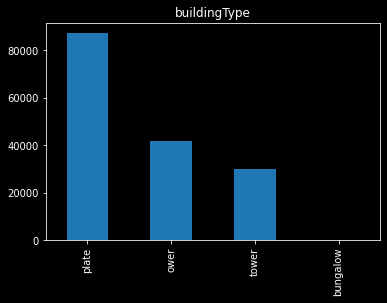

In [ ]:
# Count BuildingType feature
countFeature(fixedData, categorical_features, 0)

            sample count  percentage
hardcover          72668        45.6
Simplicity         49773        31.2
other              33682        21.1
rough               3253         2.0


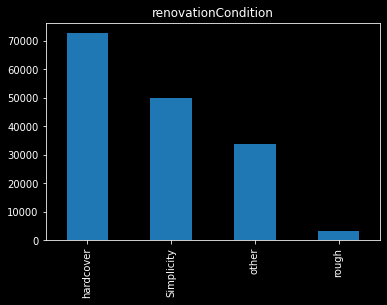

In [ ]:
# Count Renovation Condition Color
countFeature(fixedData, categorical_features, 1)

            sample count  percentage
composite          94774        59.5
mixed              57662        36.2
concrete            6768         4.2
steel                 91         0.1
wood                  49         0.0
unknow                32         0.0


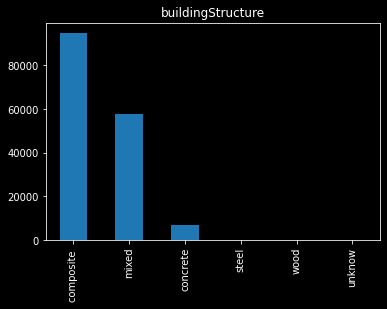

In [ ]:
# Count Building Structure feature
countFeature(fixedData, categorical_features, 2)

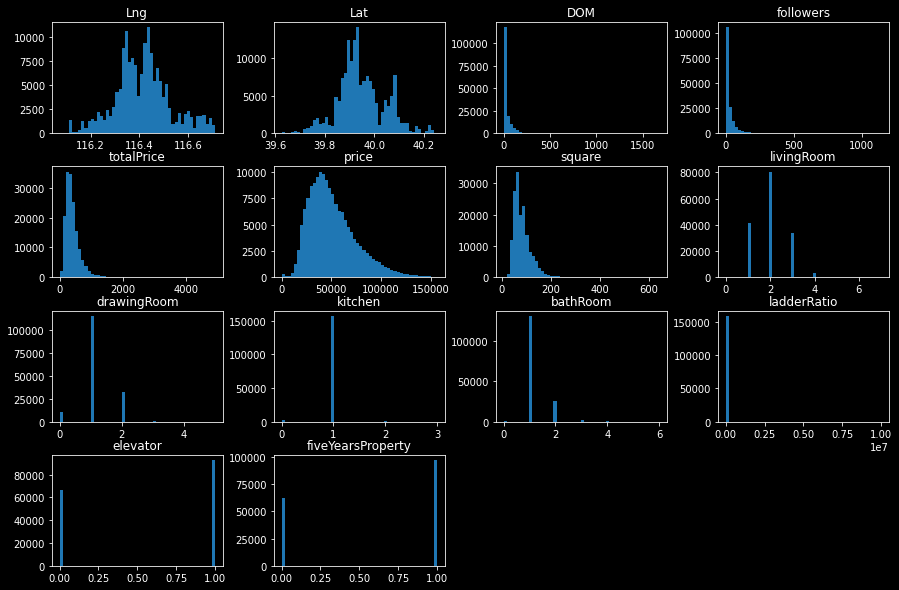

In [ ]:
# Count Numerical Feature
plt.style.use('dark_background')
fixedData.hist(bins=50, figsize=(15,10), color='#1f77b4', grid=False)
plt.show()

### *5. Exploratory Data Analysis - Multivariate Analysis*

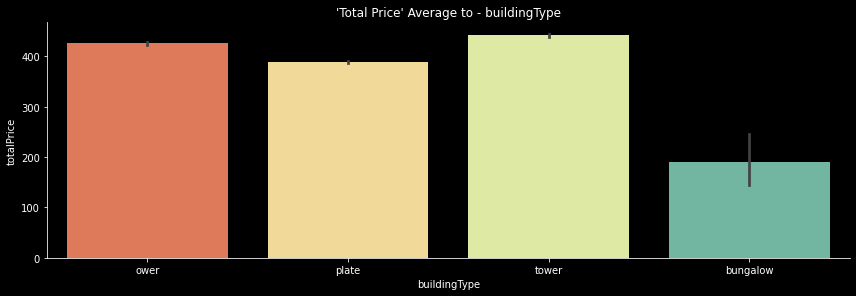

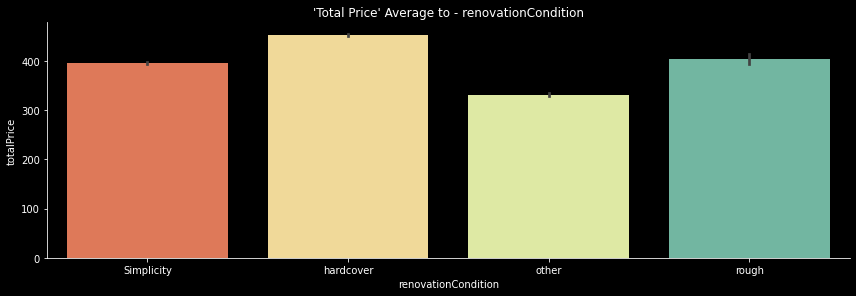

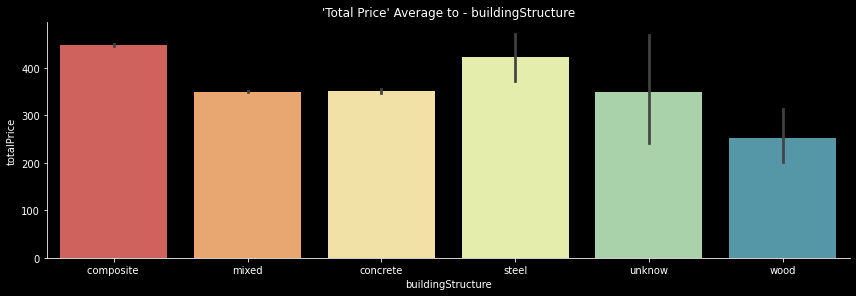

In [ ]:
# Corelation Analytics Feature
cat_features = fixedData.select_dtypes(include='object').columns.to_list()
    
for col in cat_features:
    sns.catplot(x=col, y="totalPrice", kind="bar", dodge=False, height = 4, 
                aspect = 3,  data=fixedData, palette="Spectral")
    plt.title("'Total Price' Average to - {}".format(col))

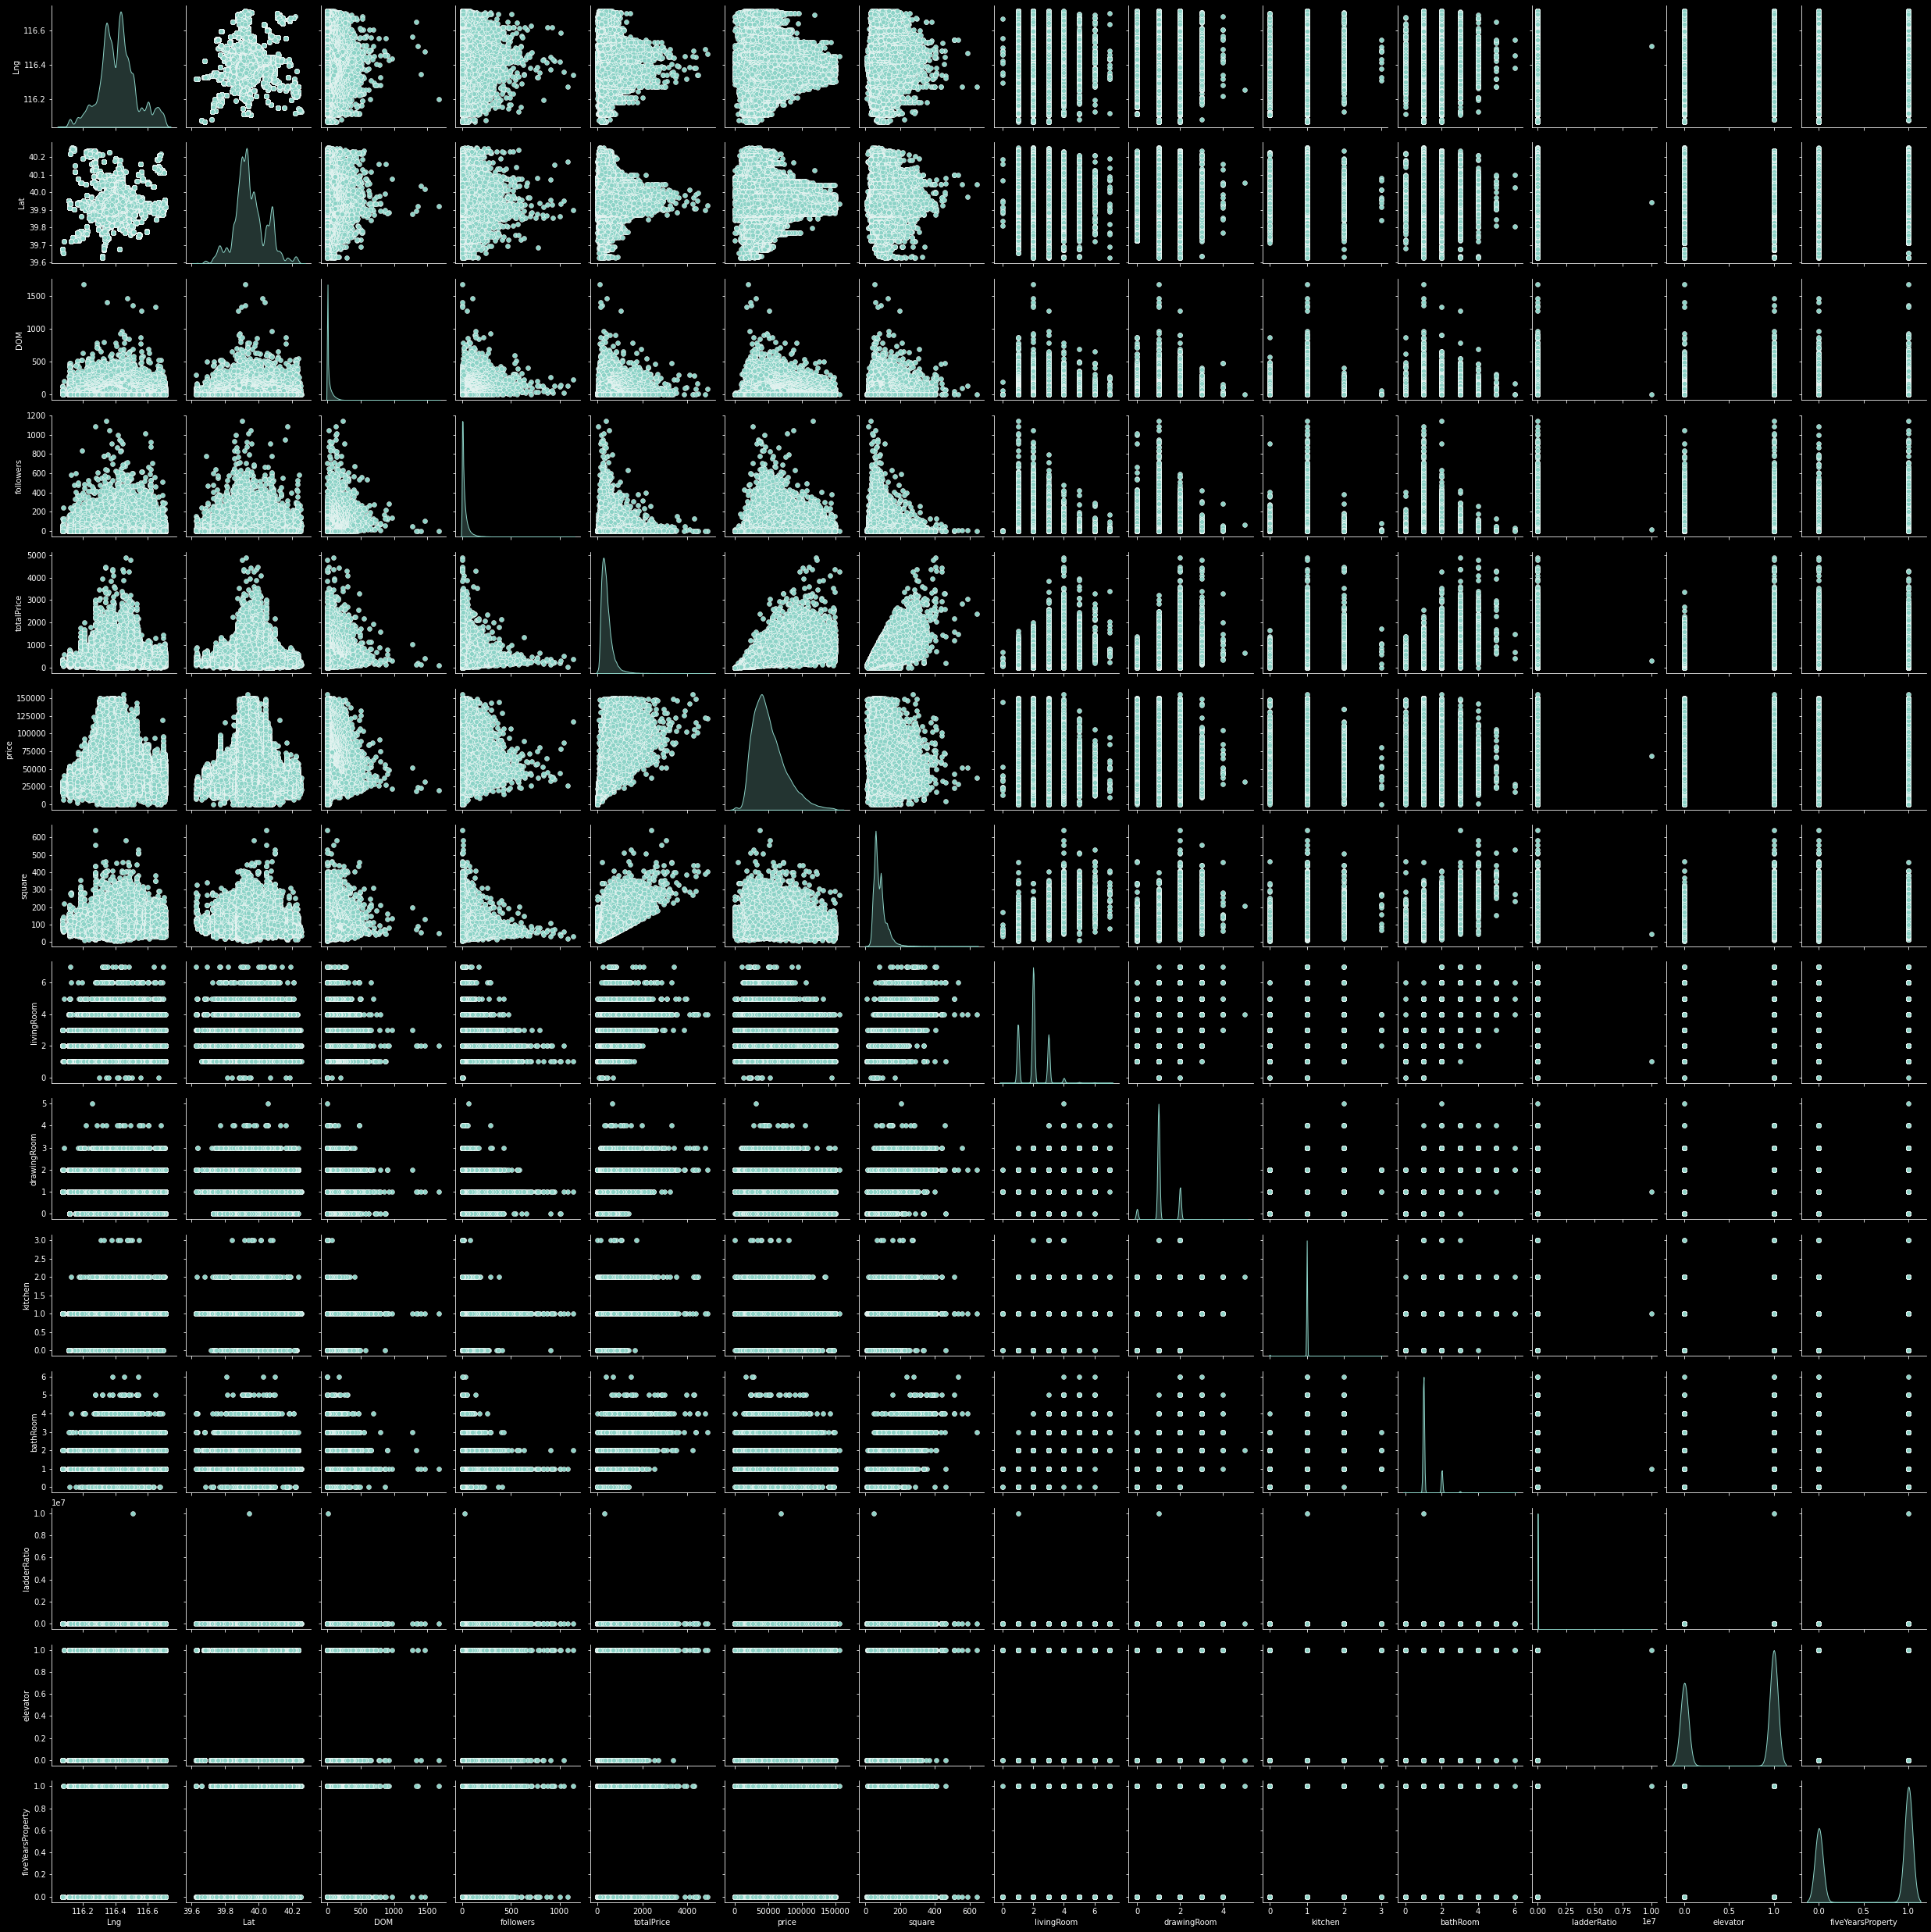

In [ ]:
# Plot Numerical Feature
# scatter_plot = sns.pairplot(fixedData, diag_kind = 'kde')
# scatter_plot.savefig('scatterplot.png')
sns.pairplot(fixedData, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix In Numerical Feature ')

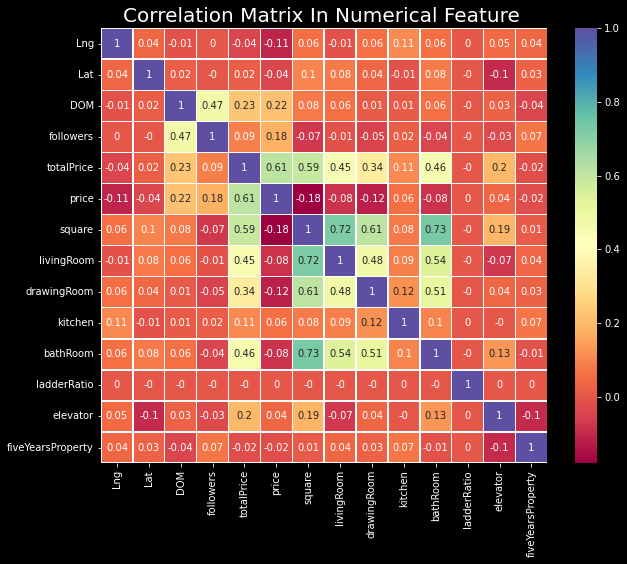

In [ ]:
# Plot in Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = fixedData.corr().round(2)
    
heatmap_fig = sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5, )
plt.title("Correlation Matrix In Numerical Feature ", size=20)

In [ ]:
# Droping uncorrelate feature
fixedData.drop(fixedData.columns.difference(['totalPrice','price', 'square', 
                                             'livingRoom', 'drawingRoom', 
                                             'bathRoom']), inplace=True, axis=1)
fixedData.head()

,totalPrice,price,square,livingRoom,drawingRoom,bathRoom
0,415.0,31680,131.00,2,1,1
1,575.0,43436,132.38,2,2,2
2,1030.0,52021,198.00,3,2,3
3,297.5,22202,134.00,3,1,1
4,392.0,48396,81.00,2,1,1


### *6. Exploratory Data Analysis - Checking Outliers*

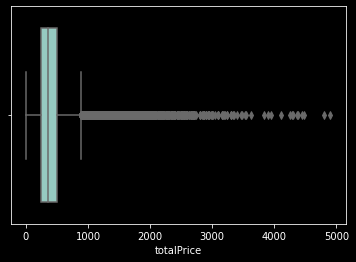

In [ ]:
# show distribution of total price feature
sns.boxplot(x=fixedData['totalPrice'])

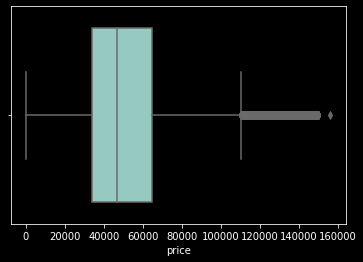

In [ ]:
# Show distribution of price feature
sns.boxplot(x=fixedData['price'])

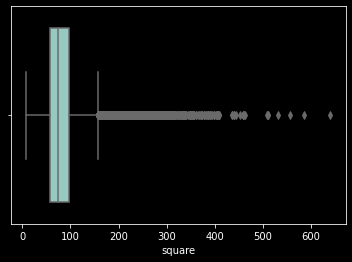

In [ ]:
# Show distribution of square feature
sns.boxplot(x=fixedData['square'])

In [ ]:
# Make Equation to drop outliers
Q1 = fixedData.quantile(0.25)
Q3 = fixedData.quantile(0.75)
IQR = Q3-Q1
fixedData = fixedData[~((fixedData<(Q1-1.5*IQR))|(fixedData>(Q3+1.5*IQR))).any(axis=1)]
    
# Check size after removing outliers
fixedData.shape

(103058, 6)

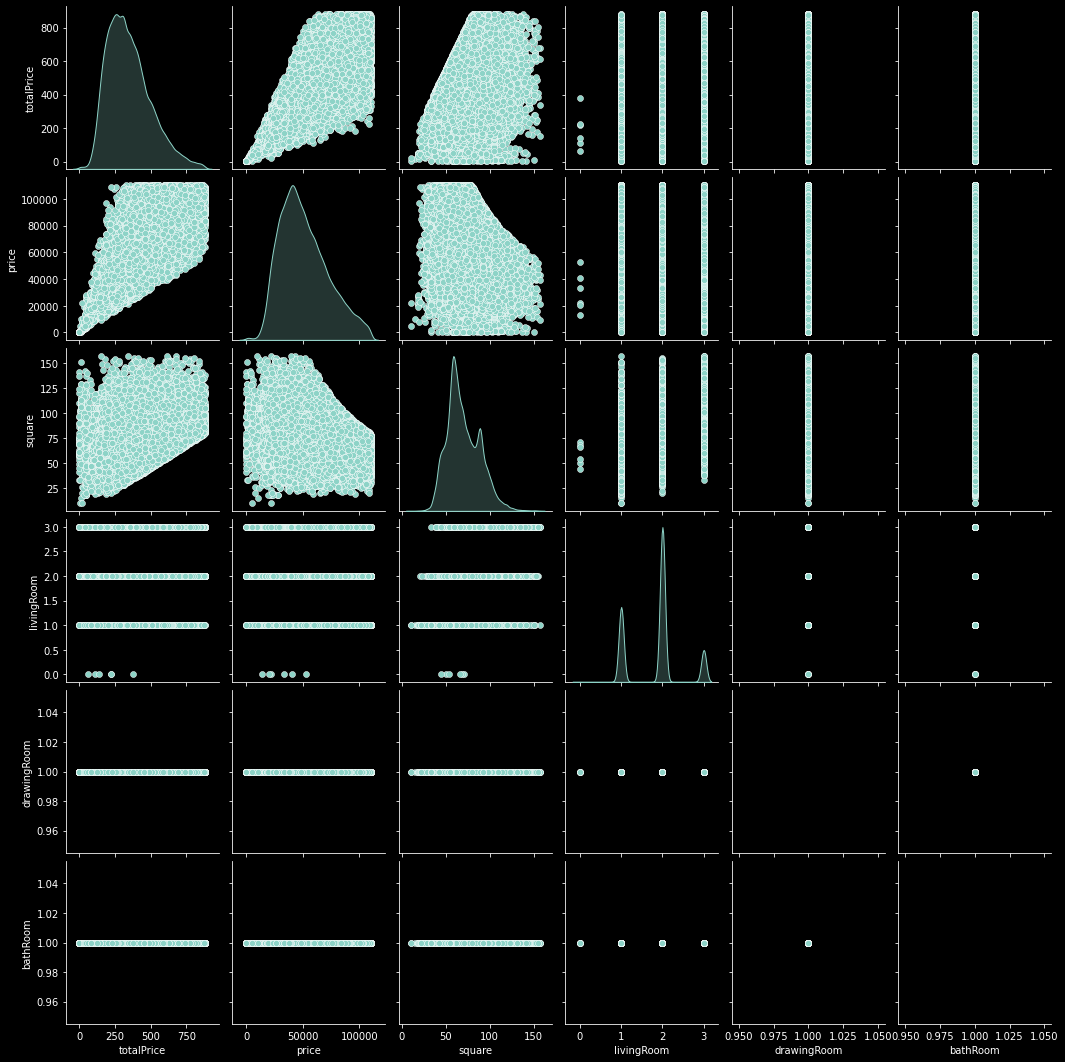

In [ ]:
# Plot data in scatterplot to verify
sns.pairplot(fixedData, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix In Numerical Feature ')

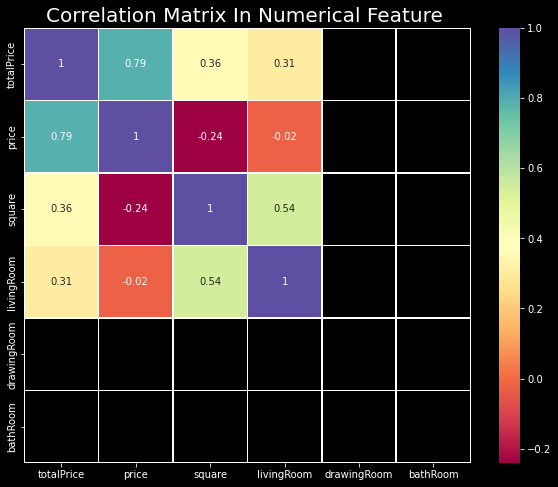

In [ ]:
# Plot data in matrix to verify
plt.figure(figsize=(10, 8))
correlation_matrix = fixedData.corr().round(2)
    
heatmap_fix = sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5, )
plt.title("Correlation Matrix In Numerical Feature ", size=20)

## **Data Preprocessing**

### *1. Split Dataset*

In [ ]:
# Split train and test set
X = fixedData.drop(["totalPrice"],axis =1)
y = fixedData["totalPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, 
                                                    random_state = 123)

In [ ]:
# Check total of test and train set
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 103058
Total # of sample in train dataset: 97905
Total # of sample in test dataset: 5153


### *2. Standarization*

In [ ]:
# Standarize data train
numerical_features = ['price', 'square']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train.head()

,price,square,livingRoom,drawingRoom,bathRoom
13487,-0.545512,1.355680,3,1,1
287007,-1.814731,1.881825,3,1,1
86853,0.587454,-0.577633,2,1,1
46931,0.805582,-0.706485,2,1,1
113624,-0.737510,-0.362880,2,1,1


In [ ]:
# Check data train statistics
X_train.describe().round(4)

,price,square,livingRoom,drawingRoom,bathRoom
count,97905.0000,97905.0000,97905.0000,97905.0,97905.0
mean,0.0000,-0.0000,1.8359,1.0,1.0
std,1.0000,1.0000,0.6180,0.0,0.0
min,-2.4030,-3.2105,0.0000,1.0,1.0
25%,-0.7559,-0.6974,1.0000,1.0,1.0
50%,-0.1610,-0.1841,2.0000,1.0,1.0
75%,0.6330,0.7243,2.0000,1.0,1.0
max,2.8004,4.6978,3.0000,1.0,1.0


## **Model Development**

In [ ]:
# Create result log
models = pd.DataFrame(index=['train', 'test'], 
                      columns=['KNN_mse', 'RandomForest_mse', 'Boosting_mse', 
                               'KNN_rmse', 'RandomForest_rmse', 'Boosting_rmse'])
models

,KNN_mse,RandomForest_mse,Boosting_mse,KNN_rmse,RandomForest_rmse,Boosting_rmse
train,NaN,NaN,NaN,NaN,NaN,NaN
test,NaN,NaN,NaN,NaN,NaN,NaN


### *1. K-Nearest Neighbor*

#### **MSE**

In [ ]:
# Train data in K-Nearest Neighbor Algorithm
knn_MSE = KNeighborsRegressor(n_neighbors=10)
knn_MSE.fit(X_train, y_train)
    
models.loc['train','KNN_mse'] = mean_squared_error(y_pred = knn_MSE.predict(X_train), 
                                                   y_true=y_train)

#### **RMSE**

In [ ]:
# Train data in K-Nearest Neighbor Algorithm
knn_RMSE = KNeighborsRegressor(n_neighbors=10)
knn_RMSE.fit(X_train, y_train)
    
models.loc['train','KNN_rmse'] = mean_squared_error(y_pred = knn_RMSE.predict(X_train), 
                                                   y_true=y_train, squared=False)

In [ ]:
# Show results log
models

,KNN_mse,RandomForest_mse,Boosting_mse,KNN_rmse,RandomForest_rmse,Boosting_rmse
train,6.80438,NaN,NaN,2.608521,NaN,NaN
test,NaN,NaN,NaN,NaN,NaN,NaN


### *2. Random Forest*

#### **MSE**

In [ ]:
# Train data in Random Forest Algorithm
RF_MSE = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, 
                               n_jobs=-1)
RF_MSE.fit(X_train, y_train)
 
models.loc['train','RandomForest_mse'] = mean_squared_error(y_pred=RF_MSE.predict(X_train), 
                                                            y_true=y_train)          

#### **RMSE**

In [ ]:
# Train data in Random Forest Algorithm
RF_RMSE = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, 
                           n_jobs=-1)
RF_RMSE.fit(X_train, y_train)
 
models.loc['train','RandomForest_rmse'] = mean_squared_error(y_pred=RF_RMSE.predict(X_train), 
                                                             y_true=y_train, 
                                                             squared=False)          

In [ ]:
# Show result log
models

,KNN_mse,RandomForest_mse,Boosting_mse,KNN_rmse,RandomForest_rmse,Boosting_rmse
train,6.80438,0.172762,NaN,2.608521,0.415646,NaN
test,NaN,NaN,NaN,NaN,NaN,NaN


### *3. Boosting Algorithm*

#### **MSE**

In [ ]:
# Train data in Boosting Algorithm
boosting_MSE = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting_MSE.fit(X_train, y_train)
models.loc['train','Boosting_mse'] = mean_squared_error(y_pred=boosting_MSE.predict(X_train), 
                                                        y_true=y_train)

#### **RMSE**

In [ ]:
# Train data in Boosting Algorithm
boosting_RMSE = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting_RMSE.fit(X_train, y_train)
models.loc['train','Boosting_rmse'] = mean_squared_error(y_pred=boosting_RMSE.predict(X_train), 
                                                         y_true=y_train, 
                                                         squared=False)

In [ ]:
# Show result log
models

,KNN_mse,RandomForest_mse,Boosting_mse,KNN_rmse,RandomForest_rmse,Boosting_rmse
train,6.80438,0.172762,3379.780709,2.608521,0.415646,58.135881
test,NaN,NaN,NaN,NaN,NaN,NaN


## **Model Evaluation**

In [ ]:
# Standarize Test Set
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Show MSE in train and test set
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN_mse', 'RF_mse', 
                                                     'Boosting_mse', 'KNN_rmse', 
                                                     'RF_rmse', 'Boosting_rmse'])
model_dict = {'KNN_mse': knn_MSE, 'RF_mse': RF_MSE, 'Boosting_mse': boosting_MSE,
              'KNN_rmse': knn_RMSE, 'RF_rmse': RF_RMSE, 'Boosting_rmse': boosting_RMSE}
 
for name, model in model_dict.items():
    if('rmse' in name):
        mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, 
                                                    y_pred=model.predict(X_train), 
                                                    squared=False)/1e3 
        mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, 
                                                   y_pred=model.predict(X_test), 
                                                   squared=False)/1e3
    else:
        mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, 
                                                    y_pred=model.predict(X_train))/1e3 
        mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, 
                                                   y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN_mse,0.006804,0.009395
RF_mse,0.000173,0.000573
Boosting_mse,3.379781,3.464695
KNN_rmse,0.002609,0.003065
RF_rmse,0.000416,0.000757
Boosting_rmse,0.058136,0.058862


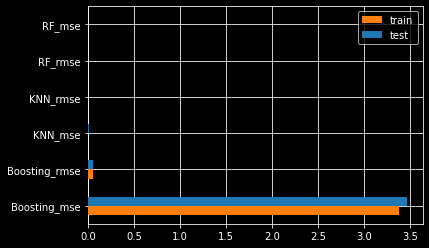

In [ ]:
# Plot MSE Result
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False,).plot(kind='barh', ax=ax, zorder=3, color=['#ff7f0e', '#1f77b4'])
ax.grid(zorder=0)

## **Model Testing**

In [ ]:
# Try Predict with test set
prediksi = X_test.iloc[:1].copy()
pred_dict = {'correct_Value':y_test[:1]}
for name, model in model_dict.items():
    pred_dict[name+'_pred'] = model.predict(prediksi)
    
pd.DataFrame(pred_dict)

,correct_Value,KNN_mse_pred,RF_mse_pred,Boosting_mse_pred,KNN_rmse_pred,RF_rmse_pred,Boosting_rmse_pred
264030,235.0,235.63,235.026677,254.350934,235.63,235.026677,254.350934


In [ ]:
# Try Predict without test set
def runPredict(model: list):
    data = pd.DataFrame({'price': int(input('Price/m² = ')), 
                         'square': float(input('Square of House = ')),
                         'livingRoom': int(input('Number of Living Room = ')),
                         'drawingRoom': int(input('Number of Drawing Room = ')),
                         'bathRoom': int(input('Number of Bathroom = '))}, [0])
    pred_dict = {}
    for name, mdl in model.items():
        pred_dict['prediksi_'+name] = mdl.predict(data).round(2)
        
    print('\n', pd.DataFrame(pred_dict))

In [ ]:
# Run function
runPredict(model_dict)

Price/m² = 44016
Square of House = 53.39
Number of Living Room = 1
Number of Drawing Room = 1
Number of Bathroom = 1

    prediksi_KNN_mse  prediksi_RF_mse  prediksi_Boosting_mse  \
0            683.15            878.9                 687.21   

   prediksi_KNN_rmse  prediksi_RF_rmse  prediksi_Boosting_rmse  
0             683.15             878.9                  687.21  
